In [1]:
!nvidia-smi

Sat Jul 13 14:40:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 19.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov8/car

/content/drive/.shortcut-targets-by-id/1rPFkpiEhn5CKgT7EPZRF9sOCepsvL-hM/car


In [22]:
!ls

drive  runs  yolov8l.pt  yolov8n.pt


In [23]:
# import os

# # Change the working directory to /content/
# os.chdir('/content/')

In [24]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov8/car

!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/ColabNotebooks/yolov8/data.yaml epochs=30 imgsz=640 plots=True


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/ColabNotebooks/yolov8/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

In [25]:
!ls runs/detect/train3/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1720886134.2f3e3992abc8.21536.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1900.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1901.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1902.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


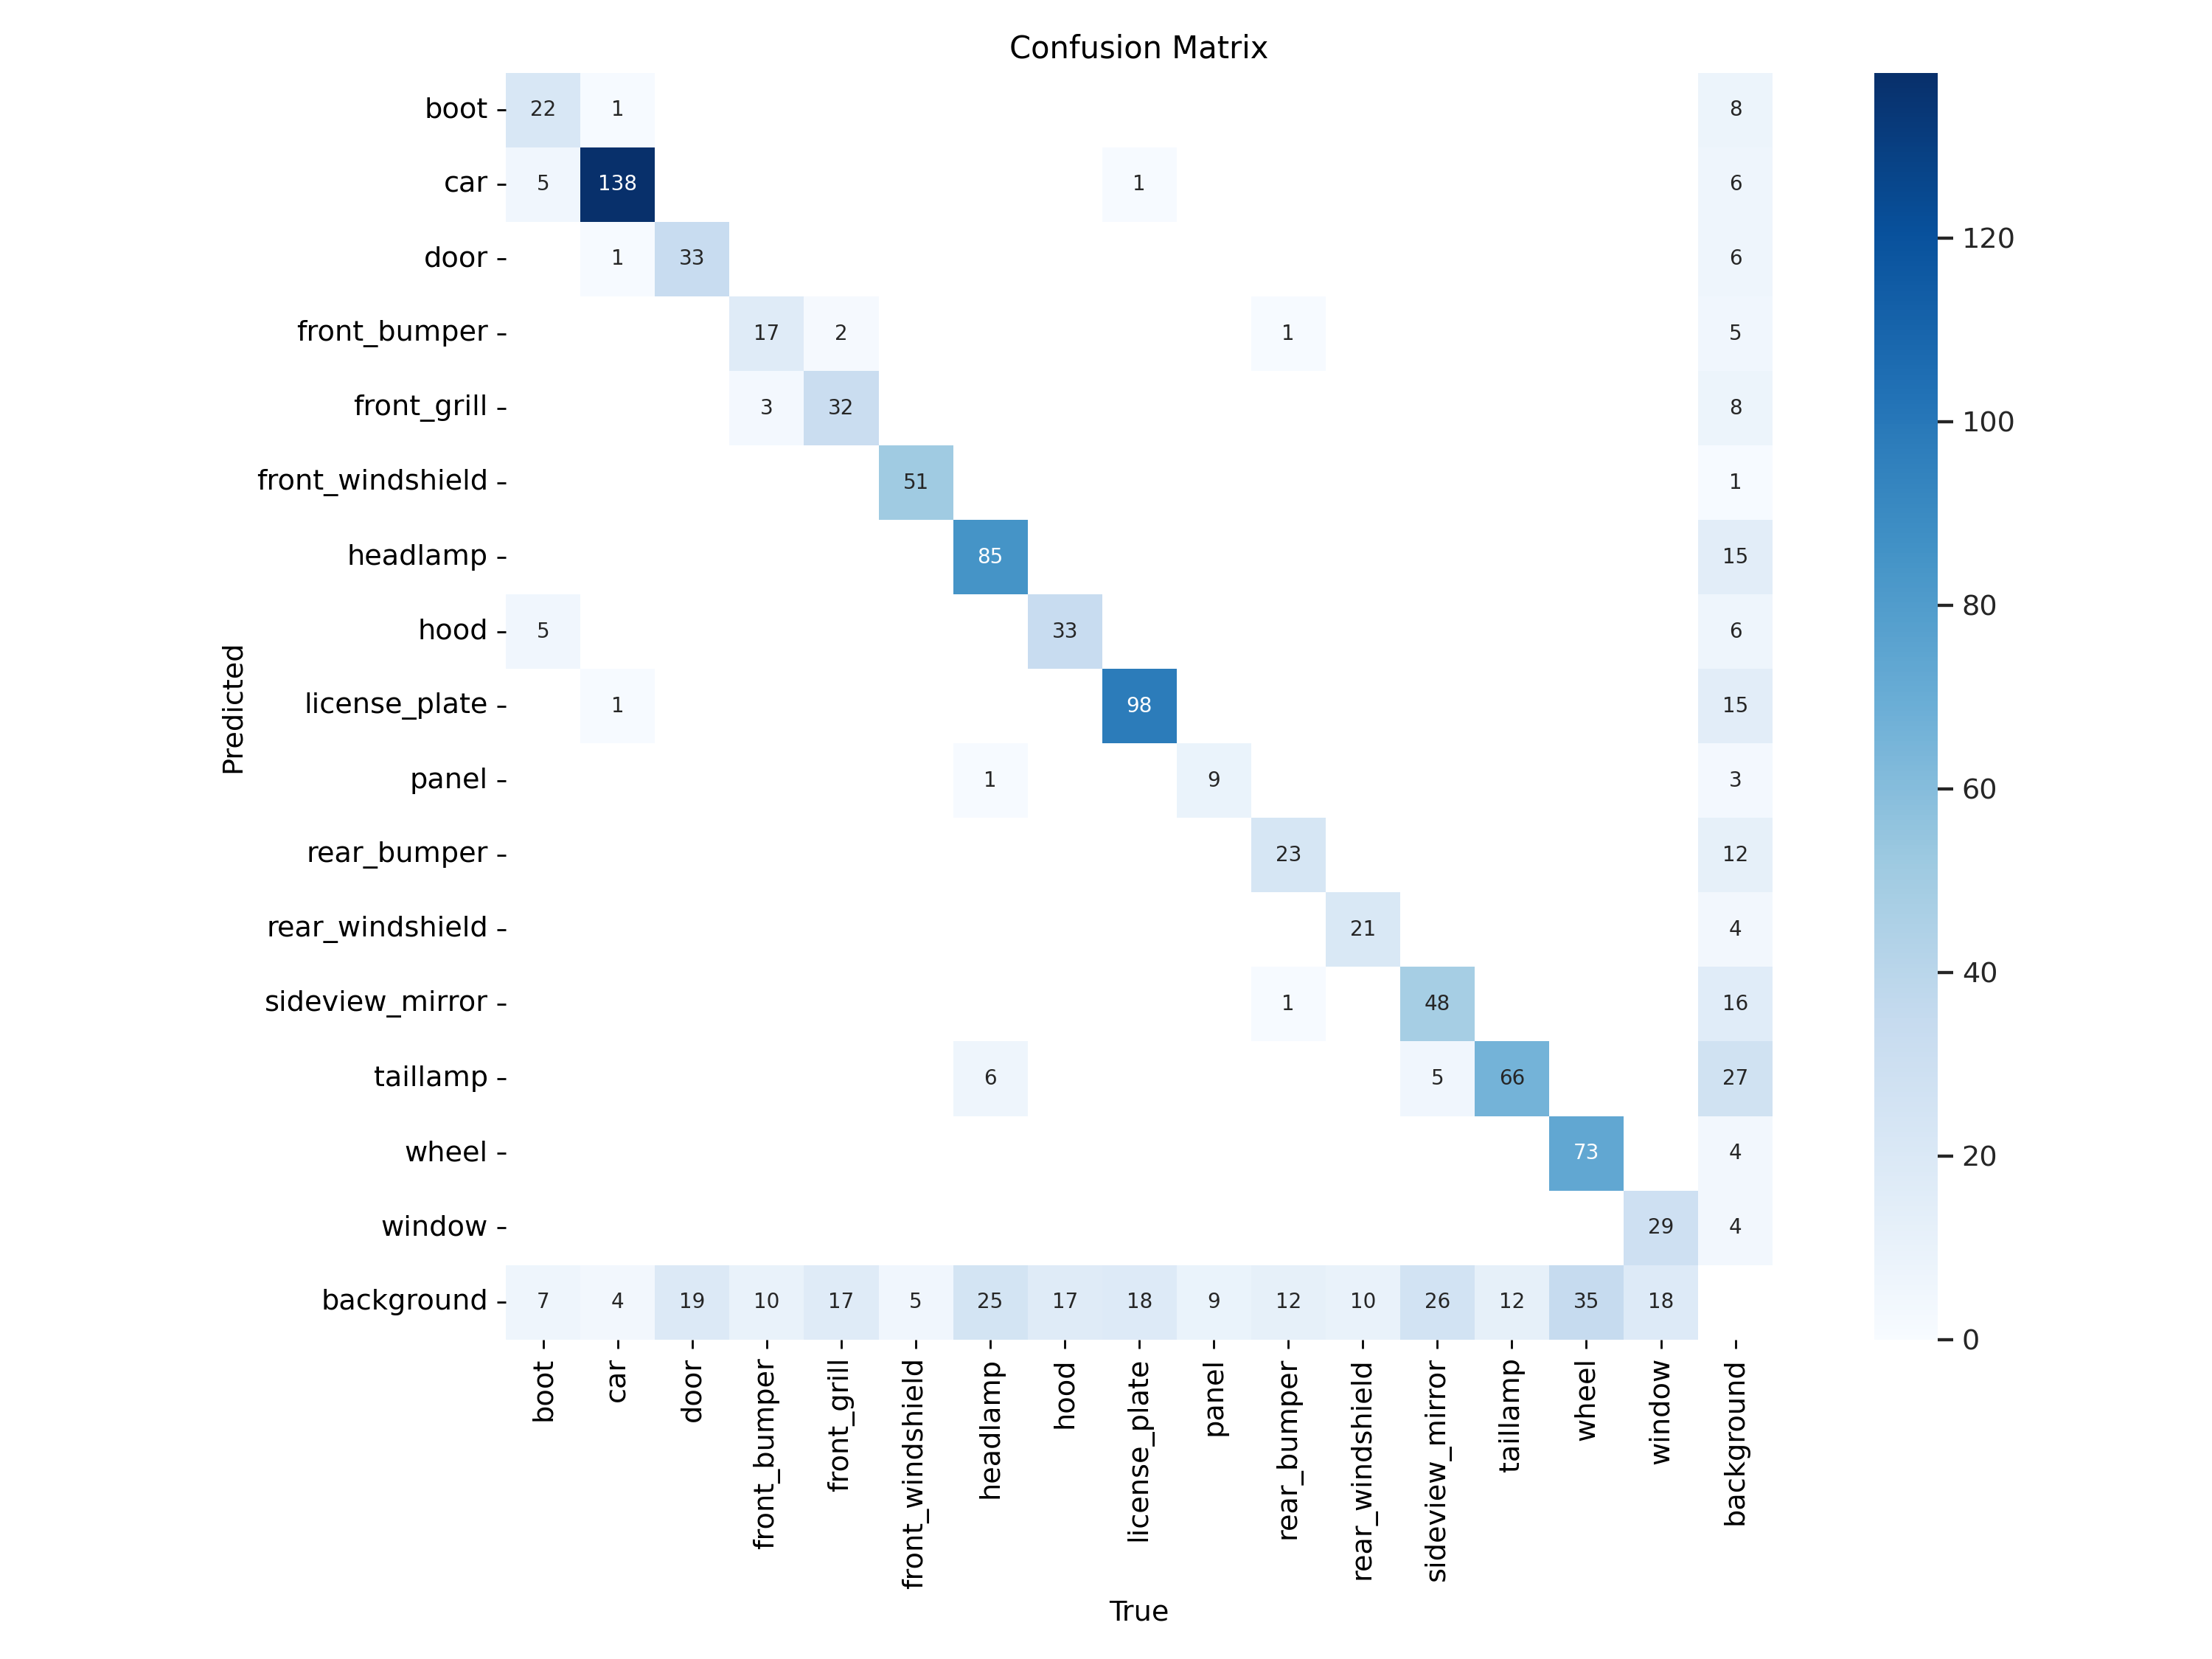

In [26]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

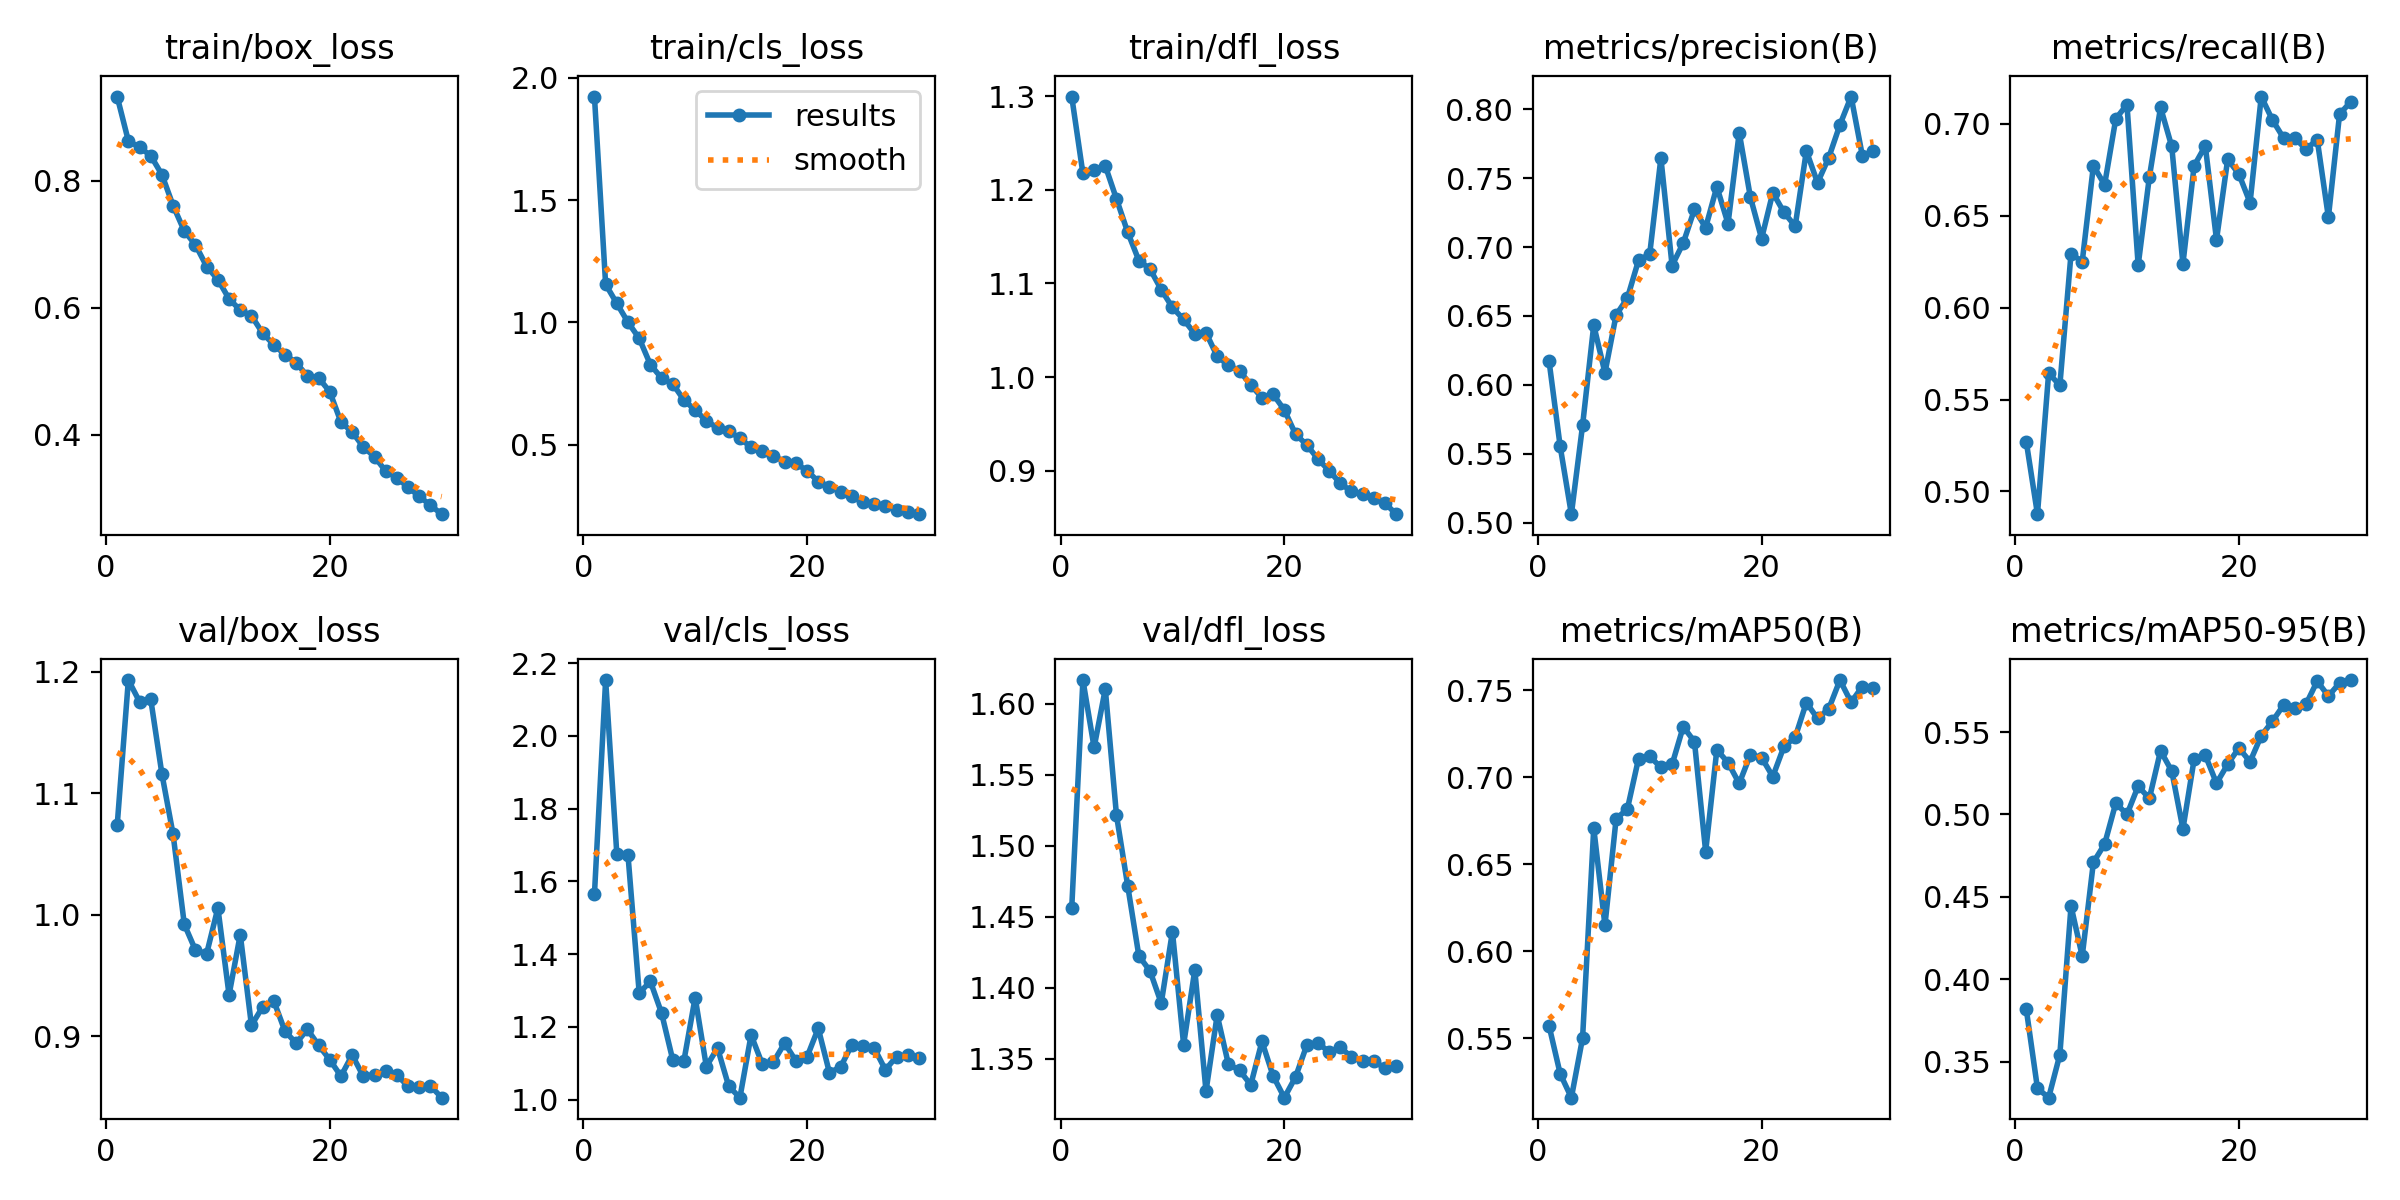

In [27]:
Image(filename='runs/detect/train3/results.png', width=600)

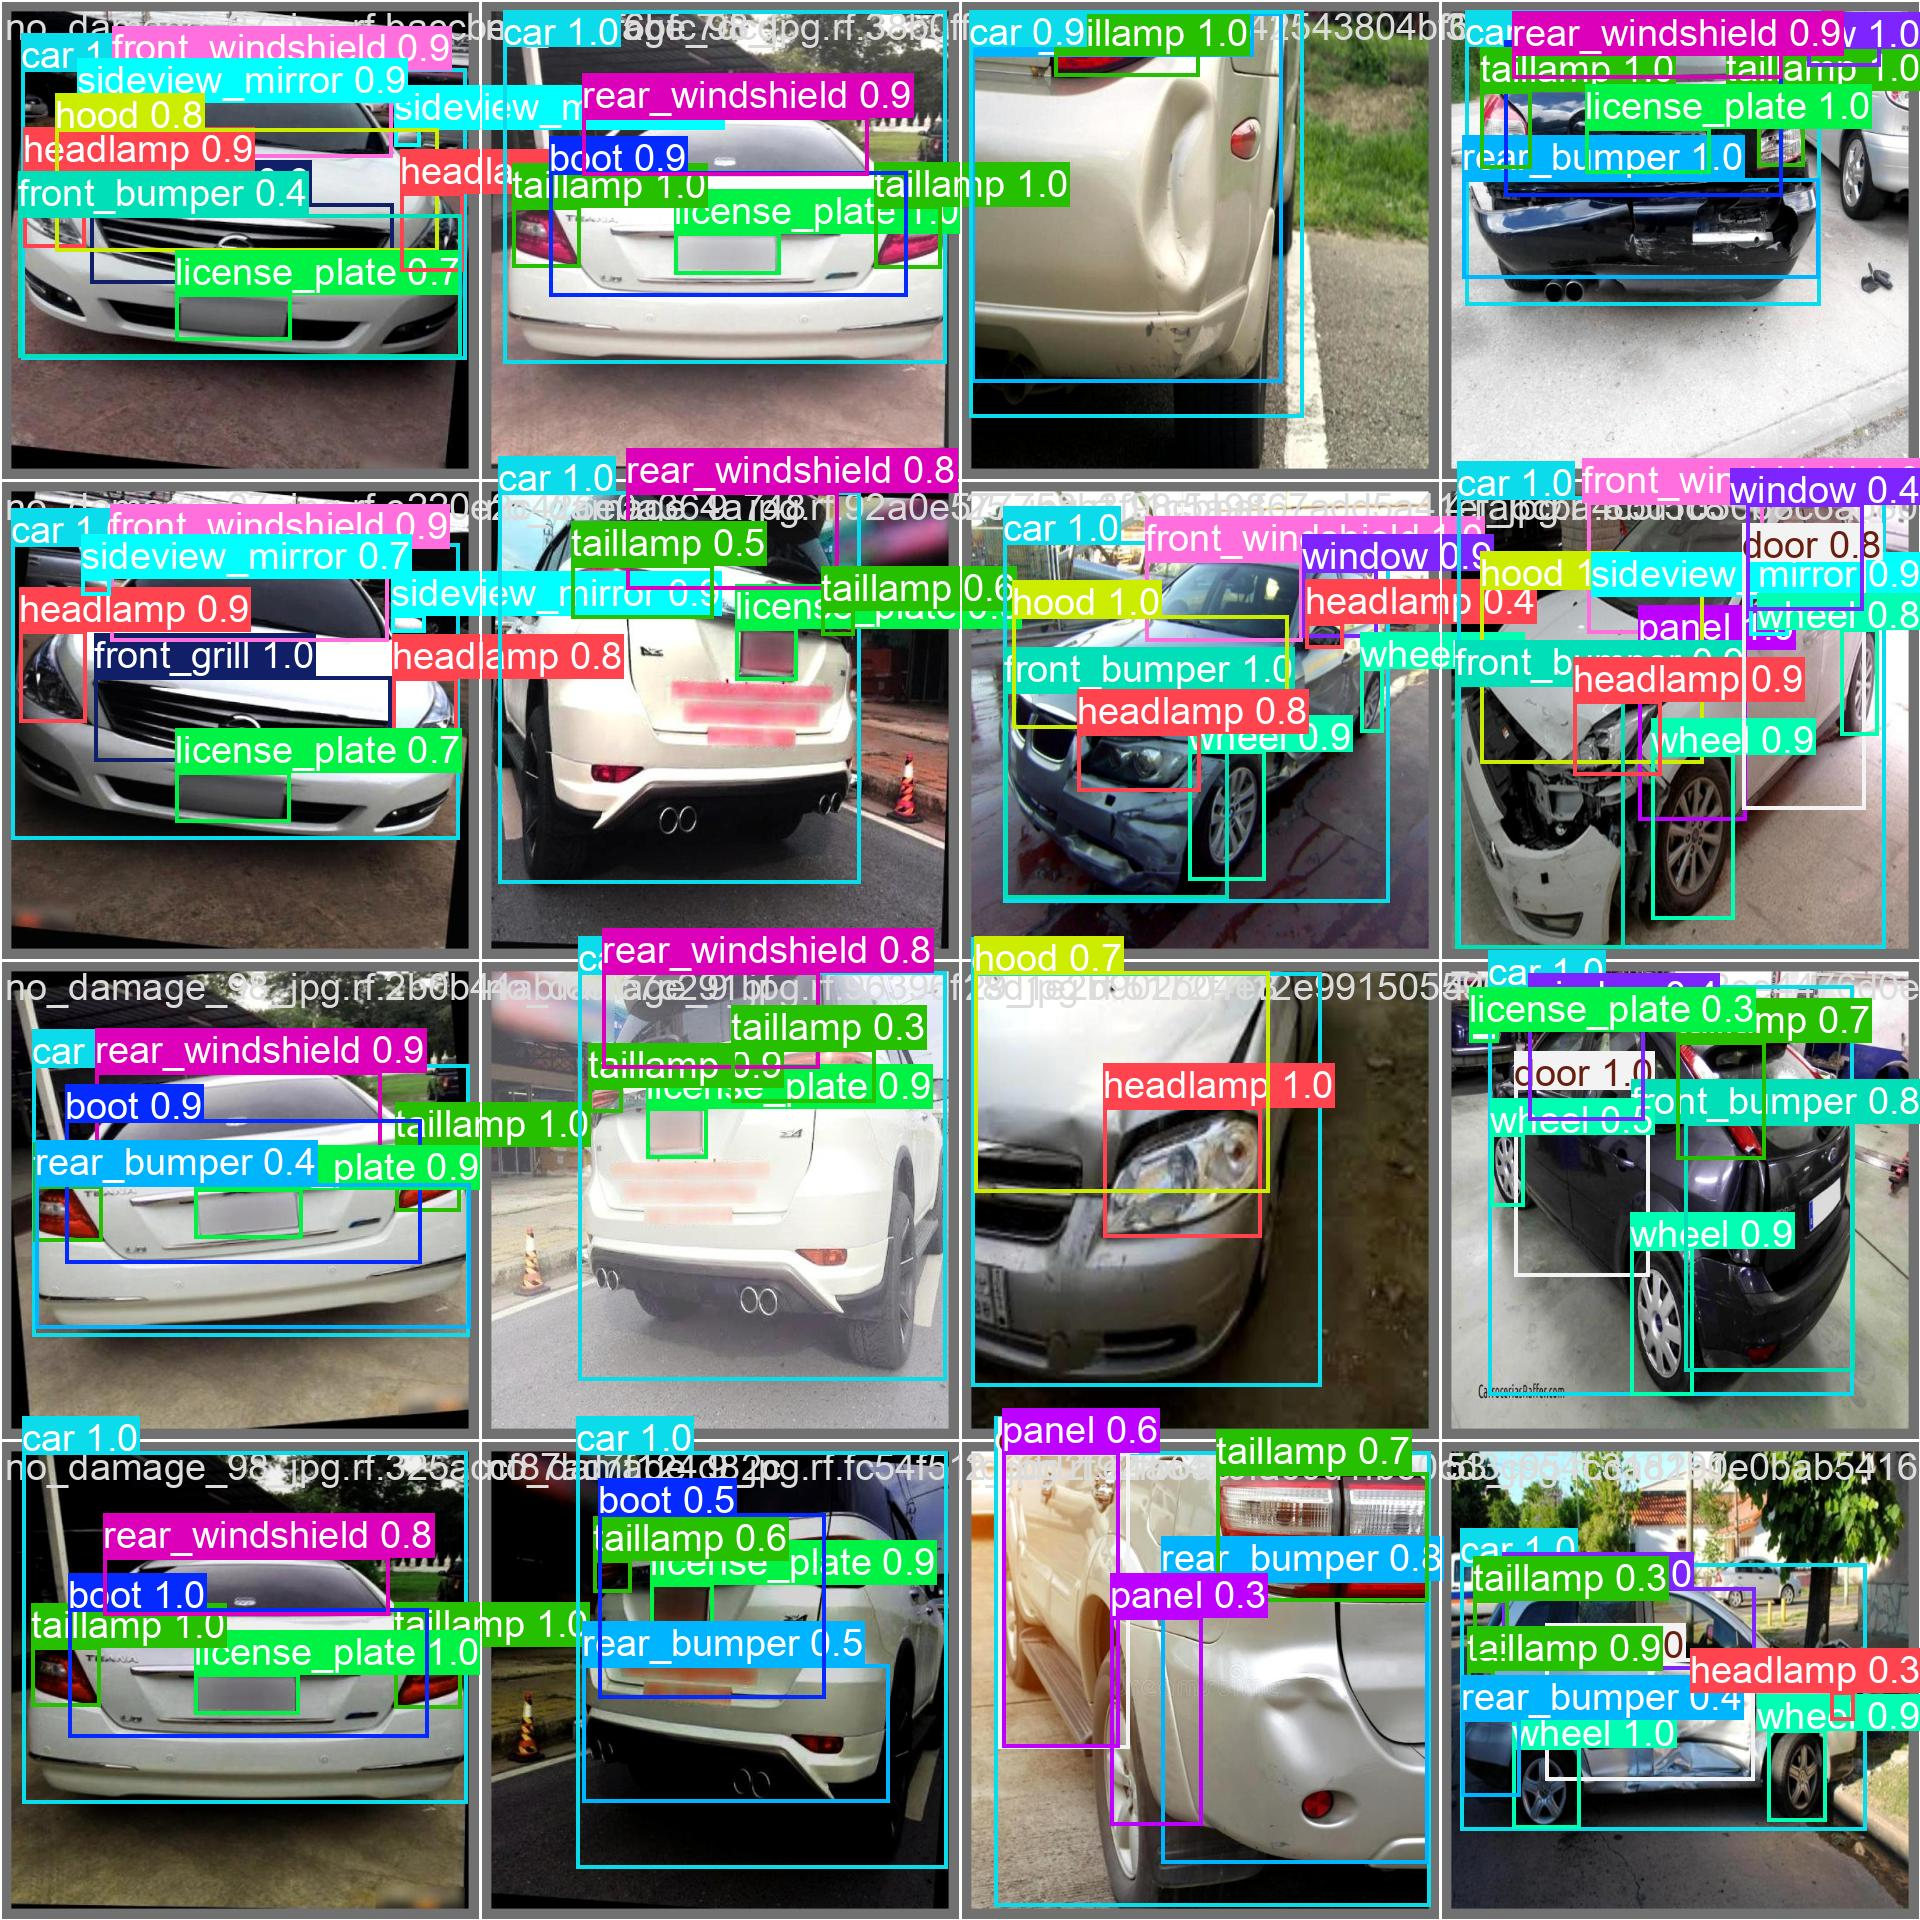

In [28]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

### Model Validation

In [29]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=/content/drive/MyDrive/ColabNotebooks/yolov8/data.yaml

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,618,944 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/drive/MyDrive/ColabNotebooks/yolov8/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:11<00:00,  1.20s/it]
                   all        160       1055      0.769      0.712      0.751      0.582
                  boot         35         39      0.732      0.629      0.677      0.601
                   car        142        145      0.928      0.979      0.959       0.91
                  door         50         52      0.788      0.635      0.802      0.585
          front_bumper         30         30       0.67       0.61      0.637      0.516
           front_grill         49         51      0.751      0.651      0.673      0.569
      front_wind

In [30]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/ColabNotebooks/yolov8/car/test/images

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,618,944 parameters, 0 gradients, 164.9 GFLOPs

image 1/22 /content/drive/MyDrive/ColabNotebooks/yolov8/car/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 car, 1 front_grill, 1 license_plate, 63.0ms
image 2/22 /content/drive/MyDrive/ColabNotebooks/yolov8/car/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 1 car, 2 license_plates, 63.0ms
image 3/22 /content/drive/MyDrive/ColabNotebooks/yolov8/car/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 2 cars, 2 license_plates, 63.0ms
image 4/22 /content/drive/MyDrive/ColabNotebooks/yolov8/car/test/images/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.jpg: 640x640 1 front_grill, 1 headlamp, 1 license_plate, 1 wheel, 63.1ms
image 5/22 /content/drive/MyDrive/ColabNotebooks/yolov8/car/test/images/Cars306_png.rf.dd001ad2f0e6c305bf5bd3d704eebd75.jpg: 